**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Aug 25 05:45:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
'113032_Tugas 1 sutik - Recommender System.rar'
'12-06-2019-00.33.46 (1).jpg'
'12-06-2019-00.33.46(1).pdf'
 12-06-2019-00.33.46.jpg
 12141_Main.cpp
 142431-media-collection.zip
 1543913363059.gdoc
 1543913363059.jpg
 1543925036069.jpg
 16083.gdoc
 16083.pdf
 183661-media-mega-pack-outlined.zip
 20180924194520.jpg
'22660_RPS EKK (Rabu) Ags-Des 2018.pdf'
'2 - Responsive Design.pptx'
'32323_Kuliah ASP 8 (Certainty Theory)2.doc'
'37154_FORMAT LPJ DIVISI.docx'
'7 

**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14263, done.
remote: Total 14263 (delta 0), reused 0 (delta 0), pack-reused 14263
Receiving objects: 100% (14263/14263), 12.63 MiB | 10.18 MiB/s, done.
Resolving deltas: 100% (9774/9774), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training_profile.cfg

In [ ]:
## 2 classes
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training_profile.cfg
# !sed -i 's/height=416/height=128/' cfg/yolov3_training_profile.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training_profile.cfg
!sed -i 's/max_batches = 500200/max_batches = 6000/' cfg/yolov3_training_profile.cfg
!sed -i 's/steps=400000,450000/steps=4800,5400/' cfg/yolov3_training_profile.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training_profile.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training_profile.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training_profile.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training_profile.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training_profile.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training_profile.cfg

## 1 classes
# !sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
# !sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
# !sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
# !sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
# !sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
# !sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
# !sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
# !sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
# !sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [ ]:
!echo -e "id\nusername" > data/obj.names
!echo -e 'classes= 2\ntrain = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

mkdir: cannot create directory ‘data/obj’: File exists


In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-08-25 05:47:53--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   216KB/s    in 8m 22s  

2020-08-25 05:56:17 (316 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /mydrive/yolov3/PUBGM_Profile.zip -d data/obj

Archive:  /mydrive/yolov3/PUBGM_Profile.zip
  inflating: data/obj/pubgp1.txt     
  inflating: data/obj/pubgp2.jpg     
  inflating: data/obj/pubgp2.txt     
  inflating: data/obj/pubgp3.png     
  inflating: data/obj/pubgp3.txt     
  inflating: data/obj/pubgp4.jpg     
  inflating: data/obj/pubgp4.txt     
  inflating: data/obj/pubgp5.jpg     
  inflating: data/obj/pubgp5.txt     
  inflating: data/obj/pubgp6.jpg     
  inflating: data/obj/pubgp6.txt     
  inflating: data/obj/pubgp7.jpg     
  inflating: data/obj/pubgp7.txt     
  inflating: data/obj/pubgp8.jpg     
  inflating: data/obj/pubgp8.txt     
  inflating: data/obj/pubgp9.jpg     
  inflating: data/obj/pubgp9.txt     
  inflating: data/obj/pubgp10.jpg    
  inflating: data/obj/pubgp10.txt    
  inflating: data/obj/pubgp11.jpg    
  inflating: data/obj/pubgp11.txt    
  inflating: data/obj/pubgp12.jpg    
  inflating: data/obj/pubgp12.txt    
  inflating: data/obj/pubgp13.jpg    
  inflating: data/obj/pubgp13.txt    
  infl

In [ ]:
import glob
images_list = glob.glob("data/obj/*[jpg|png|jpeg]")
print(images_list)

['data/obj/pubgp18.jpg', 'data/obj/pubgp13.jpg', 'data/obj/pubgp30.png', 'data/obj/pubgp3.png', 'data/obj/pubgp17.jpg', 'data/obj/pubgp9.jpg', 'data/obj/pubgp26.jpg', 'data/obj/pubgp7.jpg', 'data/obj/pubgp19.jpg', 'data/obj/pubgp28.png', 'data/obj/pubgp29.png', 'data/obj/pubgp10.jpg', 'data/obj/pubgp6.jpg', 'data/obj/pubgp1.jpg', 'data/obj/pubgp24.jpg', 'data/obj/pubgp16.jpg', 'data/obj/pubgp27.jpg', 'data/obj/pubgp20.jpg', 'data/obj/pubgp11.jpg', 'data/obj/pubgp8.jpg', 'data/obj/pubgp4.jpg', 'data/obj/pubgp14.png', 'data/obj/pubgp21.jpg', 'data/obj/pubgp5.jpg', 'data/obj/pubgp15.jpg', 'data/obj/pubgp2.jpg', 'data/obj/pubgp23.jpg', 'data/obj/pubgp12.jpg', 'data/obj/pubgp22.jpg', 'data/obj/pubgp25.jpg']


In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training_profile.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.784820, GIOU: 0.774706), Class: 0.996347, Obj: 0.519161, No Obj: 0.000106, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.069720, iou_loss = 0.020084, total_loss = 0.089803 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.778741, GIOU: 0.767009), Class: 0.999525, Obj: 0.957319, No Obj: 0.000145, .5R: 1.000000, .75R: 0.600000, count: 5, class_loss = 0.184976, iou_loss = 0.194379, total_loss = 0.379354 
 total_bbox = 98348, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000022, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.613058, GIOU: 0.613058), Class: 0.996540, Obj: 0.798271, No Obj: 

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_training_profile.cfg /mydrive/yolov3/yolov3_training_profile_last.weights -thresh 0.25

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001

In [ ]:
!ls

3rdparty			   darknet53.conv.74	   net_cam_v3.sh
backup				   DarknetConfig.cmake.in  net_cam_v4.sh
bad.list			   darknet_images.py	   obj
build				   darknet.py		   predictions.jpg
build.ps1			   darknet_video.py	   README.md
build.sh			   data			   results
cfg				   image_yolov3.sh	   scripts
chart.png			   image_yolov4.sh	   src
chart_yolov3_training_profile.png  include		   video_yolov3.sh
cmake				   json_mjpeg_streams.sh   video_yolov4.sh
CMakeLists.txt			   LICENSE
darknet				   Makefile


In [ ]:
import cv2
import matplotlib.pyplot as plt

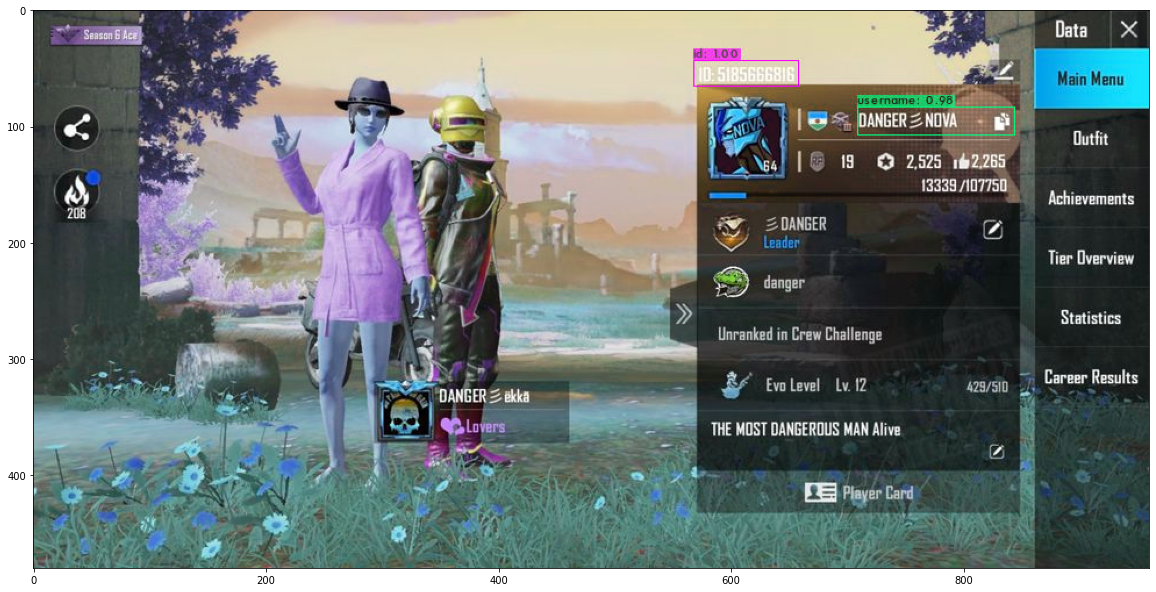

In [ ]:
img = cv2.imread('predictions.jpg')
plt.figure(figsize=(20,20))
plt.imshow(img)